## Define Problem Statement and Objectives



The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

Do the users **spend more time** on the new landing page than on the existing landing page?

Is the conversion rate (the **proportion of users** who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

Does the converted status **depend** on the preferred language?

Is the time spent on the new page **the same** for the different language users?


# Project Business Statistics: E-news Express

**Marks: 60**

## Import all the necessary libraries

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Library to help with statistical analysis
import scipy.stats as stats

# For randomized data splitting
from sklearn.model_selection import train_test_split

# To build linear regression model
import statsmodels.api as sm

# To check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Reading the Data into a DataFrame

In [ ]:
# let colab access my google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the dataset
data = pd.read_csv('/content/drive/MyDrive/Curso_DA/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

# DATA OVERVIEW

In [ ]:
# Viewing the first rows of the dataset
data.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# Viewing the last few rows of the dataset
data.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Checking the shape of the dataset
print("There are", data.shape[0], 'rows and', data.shape[1], "columns.")

There are 100 rows and 6 columns.


In [ ]:
# Getting the statistical summary for the variables
data.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


# Check for missing values

In [ ]:
# Checking for missing values
data.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64



*   There are not missing values.



In [ ]:
# Having a glimpse of the data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB




*   'converted' column values could be binary variables of 1 (yes) and 0 (no)



In [ ]:
# replacing 'converted' values to integers
data.replace(('yes', 'no'), (1, 0), inplace=True)
data.replace(('new', 'old'), (1, 0), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    int64  
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    int64  
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 4.8+ KB


# Check for duplicates

In [ ]:
data.duplicated().sum()

0



*   There are not duplicates.





### Checking count and percentage of categorical levels in each column

In [ ]:
# Making a list of all categorical variables
cat_cols =  ['group', 'landing_page', 'converted', 'language_preferred']

# Printing the count of unique categorical levels in each column
for column in cat_cols:
    print(data[column].value_counts())
    print("-" * 50)

control      50
treatment    50
Name: group, dtype: int64
--------------------------------------------------
0    50
1    50
Name: landing_page, dtype: int64
--------------------------------------------------
1    54
0    46
Name: converted, dtype: int64
--------------------------------------------------
Spanish    34
French     34
English    32
Name: language_preferred, dtype: int64
--------------------------------------------------


### Univariate Analysis

**Observations on time spent on the page**

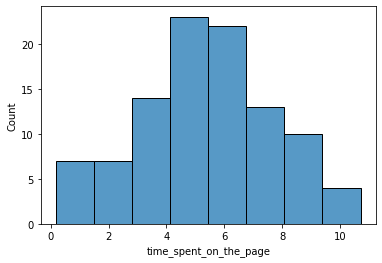

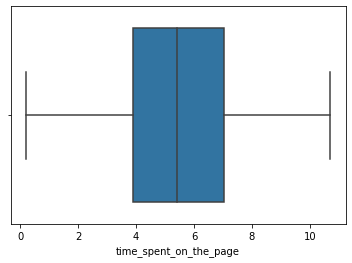

In [ ]:
sns.histplot(data=data,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=data,x='time_spent_on_the_page')
plt.show()


*   Time spent on the page follows a normal distribution.





**Oservations on language**

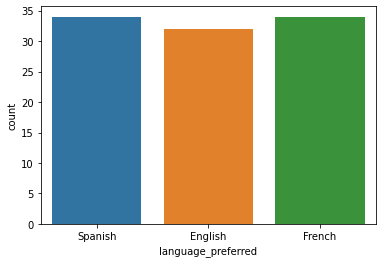

In [ ]:
sns.countplot(data=data,x='language_preferred')
plt.show()



*   The language preferred is almost evenly distributed in the sample.
*   There is no need to visualize other univariate analysis for cathegorical variables for we know they are evenly distributen among control and treatment group. 



### Bivariate Analysis

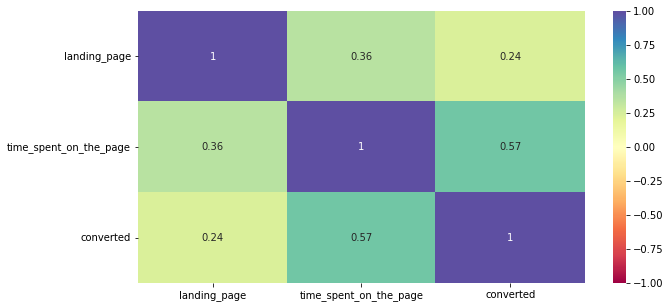

In [ ]:
#to group relevant numerical columns into one variable
num_var = ['landing_page', 'time_spent_on_the_page', 'converted']
corr = data[num_var].corr() #to create a variable to simplify map code
plt.figure(figsize=(10,5))
sns.heatmap(corr,annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()



*   There seems to be significant positive correlation between time spent on the page and converted.
*   There is a low but notable positive correlation between the time spent on the page and being exposed to the new site.
*   There is an even lower (but yet positive) correlation between being converted and being exposed to the new site. 





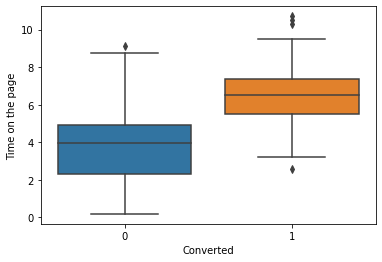

In [ ]:
boxplot = sns.boxplot(data=data,x='converted',y='time_spent_on_the_page')
boxplot.set_xlabel('Converted')
boxplot.set_ylabel('Time on the page')
plt.show()



*   The converted people in the sample definetly sepent more time on the pages. 


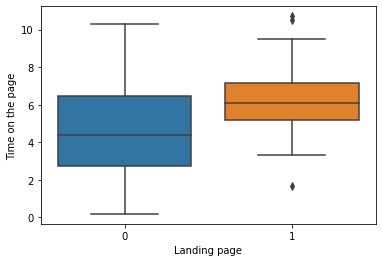

In [ ]:
boxplot1 = sns.boxplot(data=data,x='landing_page',y='time_spent_on_the_page')
boxplot1.set_xlabel('Landing page')
boxplot1.set_ylabel('Time on the page')
plt.show()



*   The new landing page got more attention than the old one. 



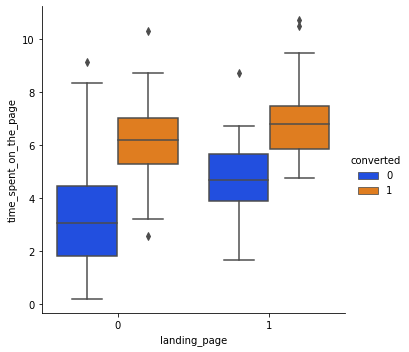

In [ ]:
sns.catplot(data=data, x='landing_page', y='time_spent_on_the_page', hue= "converted", kind='box', palette='bright')
plt.show()



*   People exposed to the new site spent more time and became suscriber 



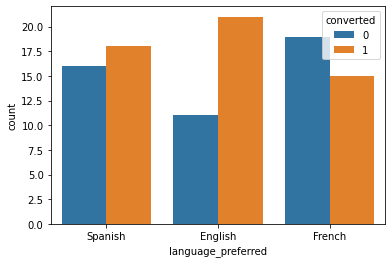

In [ ]:
#to visualize cuisines popularity by day of the week
sns.countplot(data=data,x='language_preferred', hue= "converted")
plt.show()



*   People who stated 'English' as their preferred language converted in subscriber in a higher proportion. 



## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

In [ ]:
#to create a sub-sample with control group
control = data.loc[data['group'] == 'control'] 
#to create a sub-sample with treatment group
treatment = data.loc[data['group'] == 'treatment']

Text(0.5, 1.0, 'Treatment')

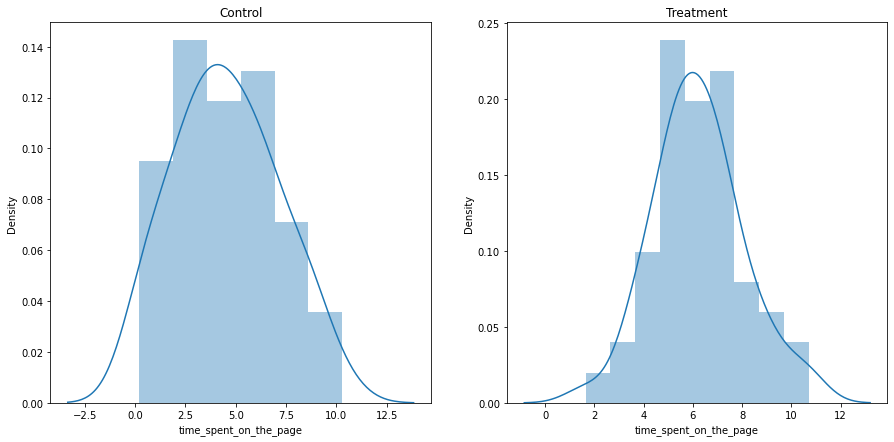

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

sns.distplot(control['time_spent_on_the_page'], ax = axs[0], kde = True)
axs[0].set_title("Control")
sns.distplot(treatment['time_spent_on_the_page'], ax = axs[1], kde = True)
axs[1].set_title("Treatment")



*   We can assume both distributions are normal.



In [ ]:
# import the required function
from scipy.stats import norm

# estimate the mean and standard deviation of time spent by control group
mu_c = control["time_spent_on_the_page"].mean()
sigma_c = control["time_spent_on_the_page"].std()
# estimate the mean and standard deviation of time spent by treatment group
mu_t = treatment["time_spent_on_the_page"].mean()
sigma_t = treatment["time_spent_on_the_page"].std()

print('The mean time spent on the page for the control group is', round(mu_c, 2))
print('The standard deviation of time spent on the page for the control group is', round(sigma_c, 2))
print('The mean time spent on the page for the treatment group is', round(mu_t, 2))
print('The standard deviation of time spent on the page for the treatment group is', round(sigma_t, 2))

The mean time spent on the page for the control group is 4.53
The standard deviation of time spent on the page for the control group is 2.58
The mean time spent on the page for the treatment group is 6.22
The standard deviation of time spent on the page for the treatment group is 1.82




*   The standard deviations for both samples are unequal.



In [ ]:
# calculate the pdf of time spent by control group using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(control["time_spent_on_the_page"].min(), control["time_spent_on_the_page"].max(), 100) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mu_c, sigma_c) # calculate the pdf() of the created numbers and store it in another column named 'pdf'

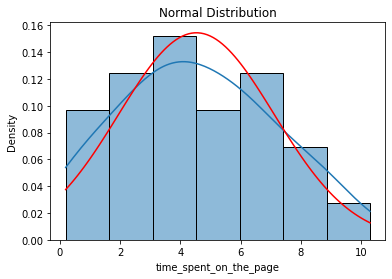

In [ ]:
fig, ax = plt.subplots() # create the subplot
sns.histplot(control["time_spent_on_the_page"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

In [ ]:
# calculate the pdf of time spent by treatment group using norm.pdf()
density = pd.DataFrame() # create an empty DataFrame
density["x"] = np.linspace(treatment["time_spent_on_the_page"].min(), treatment["time_spent_on_the_page"].max(), 100) # create an array of 100 numbers in between the min and max score range and store it in the first column of the empty DataFrame
density["pdf"] = norm.pdf(density["x"], mu_t, sigma_t) # calculate the pdf() of the created numbers and store it in another column named 'pdf'
print(mu_t)
print(sigma_t)

6.2232
1.8170310387878263


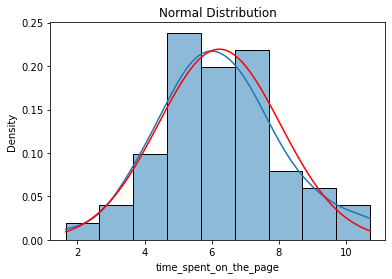

In [ ]:
fig, ax = plt.subplots() # create the subplot
sns.histplot(treatment["time_spent_on_the_page"], ax=ax, kde=True, stat="density") # plot the distribution of data using histogram
ax.plot(density["x"], density["pdf"], color="red") # plot the pdf of the normal distribution
plt.title("Normal Distribution") # set the title
plt.show() # display the plot

### Step 1: Define the null and alternate hypotheses

Let **𝜇0** be the mean time spent on web the page for the control group, and **𝜇1** be the mean time time spent on the web page for the treatment group. The hypotheses definitions are:


# 𝐻0 : 𝜇0 ≥ 𝜇1

# Ha : 𝜇0 < 𝜇1

### Step 2: Select Appropriate test


The **Two Independent Sample T-test for Equality of Means - Unequal Std Dev** is the apporpriate test for the problem.

The samples share these characteristics:

*   Continuous data (time spent on page)
*   Normally distributed populations
*   Independent populations
*   Random sampling from the population
*   Unequal standard deviations

### Step 3: Decide the significance level

The significance level is 5%, as requested by E-news Express.

In [ ]:
alpa = 0.05

### Step 4: Collect and prepare data

In [ ]:
top_rest = data.groupby('group', as_index = False)['time_spent_on_the_page']
print(top_rest)

### Step 5: Calculate the p-value

In [ ]:
#import the required functions
from scipy.stats import ttest_ind

# find the p-value
test_stat, p_value = ttest_ind(control['time_spent_on_the_page'], treatment['time_spent_on_the_page'].dropna(), equal_var = False)
print('The p-value is ', p_value)
print(test_stat)

The p-value is  0.0002784762450333098
-3.7867702694199856


### Step 6: Compare the p-value with $\alpha$

### Step 7:  Draw inference

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

## 3. Is the conversion and preferred language are independent or related?

## 4. Is the time spent on the new page same for the different language users?

## Conclusion and Business Recommendations

___